## libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from xgboost import XGBRegressor


import joblib
from flask import Flask, request, jsonify


import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [2]:
data = pd.read_csv('turboaz_27_09_2023.csv')

In [3]:
data

,link,title,update,views,city,make,model,year,ban_type,colour,engine,ride,transmission,gear,is_new,price
0,https://turbo.az/autos/6677912-jeep-wrangler,"Jeep Wrangler,",Yeniləndi: 04.09.2023,Baxışların sayı: 45926,Bakı,Jeep,Wrangler,2022,Offroader / SUV,Boz,2.0 L/272 a.g./Benzin,0 km,Avtomat,Tam,Bəli,79 500 USD
1,https://turbo.az/autos/7751449-porsche-cayenne...,"Porsche Cayenne GTS,",Yeniləndi: 27.09.2023,Baxışların sayı: 1393,Gəncə,Porsche,Cayenne GTS,2009,Offroader / SUV,Qara,4.8 L/405 a.g./Benzin,180 000 km,Avtomat,Tam,Xeyr,34 700 AZN
2,https://turbo.az/autos/7036596-land-rover-disc...,"Land Rover Discovery,",Yeniləndi: 27.09.2023,Baxışların sayı: 5372,Bakı,Land Rover,Discovery,2017,Offroader / SUV,Yaş Asfalt,2.0 L/240 a.g./Dizel,83 300 km,Avtomat,Tam,Xeyr,54 500 USD
3,https://turbo.az/autos/7388272-chevrolet-cruze,"Chevrolet Cruze,",Yeniləndi: 27.09.2023,Baxışların sayı: 3562,Sumqayıt,Chevrolet,Cruze,2013,Sedan,Bej,1.4 L/140 a.g./Benzin,172 985 km,Avtomat,Ön,Xeyr,14 900 AZN
4,https://turbo.az/autos/7771961-nissan-tiida,"Nissan Tiida,",Yeniləndi: 27.09.2023,Baxışların sayı: 18,Bakı,Nissan,Tiida,2012,Sedan,Ağ,1.5 L/109 a.g./Benzin,67 800 km,Avtomat,Ön,Xeyr,15 500 AZN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11254,https://turbo.az/autos/7760624-bmw-328,"BMW 328,",Yeniləndi: 26.09.2023,Baxışların sayı: 2561,Bakı,BMW,328,2012,Sedan,Ağ,2.0 L/245 a.g./Benzin,150 000 km,Avtomat,Arxa,Xeyr,25 500 AZN
11255,https://turbo.az/autos/7415906-land-rover-defe...,"Land Rover Defender,",Yeniləndi: 23.09.2023,Baxışların sayı: 9901,Bakı,Land Rover,Defender,2023,Offroader / SUV,Boz,3.0 L/400 a.g./Benzin,0 km,Avtomat,Tam,Bəli,137 555 USD
11256,https://turbo.az/autos/7764075-mercedes-c-180,"Mercedes C 180,",Yeniləndi: 24.09.2023,Baxışların sayı: 2504,Sumqayıt,Mercedes,C 180,1998,Sedan,Gümüşü,1.8 L/122 a.g./Benzin,36 000 km,Avtomat,Arxa,Xeyr,10 200 AZN
11257,https://turbo.az/autos/7740306-kia-stinger,"Kia Stinger,",Yeniləndi: 23.09.2023,Baxışların sayı: 10015,Lənkəran,Kia,Stinger,2019,Liftbek,Narıncı,3.3 L/370 a.g./Benzin,97 000 km,Avtomat,Tam,Xeyr,28 000 USD


In [4]:
data.isna().sum()

link            0
title           0
update          0
views           0
city            0
make            0
model           0
year            0
ban_type        0
colour          0
engine          0
ride            0
transmission    0
gear            0
is_new          0
price           0
dtype: int64

In [5]:
data.duplicated().sum()

0

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11259 entries, 0 to 11258
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   link          11259 non-null  object
 1   title         11259 non-null  object
 2   update        11259 non-null  object
 3   views         11259 non-null  object
 4   city          11259 non-null  object
 5   make          11259 non-null  object
 6   model         11259 non-null  object
 7   year          11259 non-null  int64 
 8   ban_type      11259 non-null  object
 9   colour        11259 non-null  object
 10  engine        11259 non-null  object
 11  ride          11259 non-null  object
 12  transmission  11259 non-null  object
 13  gear          11259 non-null  object
 14  is_new        11259 non-null  object
 15  price         11259 non-null  object
dtypes: int64(1), object(15)
memory usage: 1.4+ MB


In [7]:
data.columns

Index(['link', 'title', 'update', 'views', 'city', 'make', 'model', 'year',
       'ban_type', 'colour', 'engine', 'ride', 'transmission', 'gear',
       'is_new', 'price'],
      dtype='object')

In [8]:
data.describe()

,year
count,11259.000000
mean,2010.992983
std,8.218051
min,1954.000000
25%,2007.000000
50%,2012.000000
75%,2016.000000
max,2023.000000


## update column

In [9]:
data['update'].unique()

array(['Yeniləndi: 04.09.2023', 'Yeniləndi: 27.09.2023',
       'Yeniləndi: 22.09.2023', 'Yeniləndi: 26.09.2023',
       'Yeniləndi: 25.09.2023', 'Yeniləndi: 20.09.2023',
       'Yeniləndi: 24.09.2023', 'Yeniləndi: 17.09.2023',
       'Yeniləndi: 29.08.2023', 'Yeniləndi: 08.09.2023',
       'Yeniləndi: 15.09.2023', 'Yeniləndi: 14.09.2023',
       'Yeniləndi: 13.09.2023', 'Yeniləndi: 30.08.2023',
       'Yeniləndi: 02.09.2023', 'Yeniləndi: 21.09.2023',
       'Yeniləndi: 03.09.2023', 'Yeniləndi: 19.09.2023',
       'Yeniləndi: 23.09.2023', 'Yeniləndi: 10.09.2023',
       'Yeniləndi: 18.09.2023', 'Yeniləndi: 16.09.2023',
       'Yeniləndi: 28.08.2023', 'Yeniləndi: 12.09.2023',
       'Yeniləndi: 01.09.2023', 'Yeniləndi: 06.09.2023',
       'Yeniləndi: 11.09.2023', 'Yeniləndi: 05.09.2023',
       'Yeniləndi: 31.08.2023', 'Yeniləndi: 09.09.2023',
       'Yeniləndi: 07.09.2023'], dtype=object)

In [10]:
def convert_update_column_to_datetime(data, column_name ,new_column_name):
    data[new_column_name] = pd.to_datetime(data[column_name].str.replace('Yeniləndi: ', '', regex=True), format='%d.%m.%Y')
    return data
data = convert_update_column_to_datetime(data, 'update', 'date')

In [11]:
data['date'].unique()

<DatetimeArray>
['2023-09-04 00:00:00', '2023-09-27 00:00:00', '2023-09-22 00:00:00',
 '2023-09-26 00:00:00', '2023-09-25 00:00:00', '2023-09-20 00:00:00',
 '2023-09-24 00:00:00', '2023-09-17 00:00:00', '2023-08-29 00:00:00',
 '2023-09-08 00:00:00', '2023-09-15 00:00:00', '2023-09-14 00:00:00',
 '2023-09-13 00:00:00', '2023-08-30 00:00:00', '2023-09-02 00:00:00',
 '2023-09-21 00:00:00', '2023-09-03 00:00:00', '2023-09-19 00:00:00',
 '2023-09-23 00:00:00', '2023-09-10 00:00:00', '2023-09-18 00:00:00',
 '2023-09-16 00:00:00', '2023-08-28 00:00:00', '2023-09-12 00:00:00',
 '2023-09-01 00:00:00', '2023-09-06 00:00:00', '2023-09-11 00:00:00',
 '2023-09-05 00:00:00', '2023-08-31 00:00:00', '2023-09-09 00:00:00',
 '2023-09-07 00:00:00']
Length: 31, dtype: datetime64[ns]

## view column

In [12]:
def clean_view(data, column_name ,new_column_name):
    data[new_column_name] = data[column_name].str.replace('Baxışların sayı: ', '', regex=True)
    return data
data = clean_view(data, 'views', 'views_cleaned')
data['views_cleaned'] = pd.to_numeric(data['views_cleaned'].str.replace('[^\d.]', '', regex=True), errors='coerce')

## city column

In [13]:
data['city'].unique()

array(['Bakı', 'Gəncə', 'Sumqayıt', 'Lənkəran', 'Şamaxı', 'Sabirabad',
       'Salyan', 'Masallı', 'Şirvan', 'İsmayıllı', 'Biləsuvar', 'Ağdaş',
       'Tovuz', 'Goranboy', 'Şəki', 'Xırdalan', 'Ağcabədi', 'Quba',
       'Balakən', 'Şəmkir', 'Qazax', 'Mingəçevir', 'Bərdə', 'Saatlı',
       'Xaçmaz', 'Kürdəmir', 'Göyçay', 'Neftçala', 'Ağsu', 'Qəbələ',
       'Tərtər', 'Naxçıvan', 'Astara', 'Qax', 'Siyəzən', 'Lerik',
       'Yevlax', 'Gədəbəy', 'İmişli', 'Zaqatala', 'Göygöl', 'Yardımlı',
       'Şabran', 'Qusar', 'Beyləqan', 'Samux', 'Ağdam', 'Cəlilabad',
       'Ağstafa', 'Hacıqabul', 'Ucar', 'Füzuli', 'Qobustan', 'Xudat',
       'Oğuz', 'Zərdab', 'Babək', 'Göytəpə', 'Cəbrayıl', 'Daşkəsən',
       'Naftalan', 'Dəliməmmədli'], dtype=object)

In [14]:
data['city'].value_counts()

city
Bakı            8858
Sumqayıt         916
Gəncə            294
Lənkəran         106
Xırdalan          99
                ... 
Göytəpə            1
Cəbrayıl           1
Daşkəsən           1
Naftalan           1
Dəliməmmədli       1
Name: count, Length: 62, dtype: int64

## make column

In [15]:
data['make'].unique()

array(['Jeep', 'Porsche', 'Land Rover', 'Chevrolet', 'Nissan', 'Hyundai',
       'Toyota', 'LADA (VAZ)', 'Mercedes', 'Mazda', 'Kia', 'Infiniti',
       'BMW', 'Opel', 'Ford', 'Daewoo', 'Mitsubishi', 'Volkswagen',
       'Dodge', 'Audi', 'Renault', 'Tufan', 'Changan', 'Lexus', 'Honda',
       'Cadillac', 'Khazar', 'Dacia', 'Ravon', 'Soueast', 'Suzuki', 'GAZ',
       'Chery', 'Haval', 'HOWO', 'Bestune', 'Mini', 'Jaguar', 'MAN',
       'BYD', 'Rover', 'VGV', 'Zeekr', 'DAF', 'Volvo', 'Vespa', 'Baic',
       'Lincoln', 'Fiat', 'Tesla', 'KamAz', 'GMC', 'Haima', 'JAC',
       'Citroen', 'Subaru', 'FAW', 'Great Wall', 'Bentley', 'IM',
       'Mercedes-Maybach', 'IJ', 'Megelli', 'SEAT', 'Peugeot',
       'Iran Khodro', 'MAZ', 'Polestar', 'Skoda', 'Togg', 'DFSK', 'Tofas',
       'ZIL', 'ZAZ', 'Iveco', 'Shacman', 'UAZ', 'MG', 'Karry', 'Maserati',
       'Leapmotor', 'KAIYI', 'Foton', 'Isuzu', 'Jetour', 'Saipa',
       'Skywell', 'Mondial', 'Voyah', 'Moskvich', 'Scania', 'CFMOTO',
       'Lifan', 

In [16]:
data['make'].value_counts()

make
Mercedes      1668
Hyundai       1428
Kia           1180
Toyota        1125
LADA (VAZ)     839
              ... 
Mondial          1
Karry            1
Megelli          1
Rover            1
Ferrari          1
Name: count, Length: 138, dtype: int64

## model column

In [17]:
data['model'].value_counts()

model
Sorento     440
Santa Fe    420
Astra       315
Elantra     293
2107        264
           ... 
R500          1
CLS 300       1
141           1
NHR 55 E      1
GLE 250       1
Name: count, Length: 997, dtype: int64

## year column

In [18]:
data['year'].unique()

array([2022, 2009, 2017, 2013, 2012, 1993, 2023, 2003, 2004, 2015, 2011,
       1994, 2014, 2000, 2002, 2007, 2010, 1995, 2019, 2006, 2008, 2016,
       2021, 1997, 2018, 2020, 2005, 1999, 1998, 1996, 2001, 1988, 1987,
       1984, 1989, 1991, 1990, 1992, 1980, 1985, 1976, 1986, 1983, 1982,
       1973, 1979, 1971, 1975, 1981, 1977, 1968, 1978, 1972, 1960, 1954,
       1974], dtype=int64)

In [19]:
data['year'].value_counts().head()

year
2014    915
2013    763
2015    729
2023    709
2012    685
Name: count, dtype: int64

## ban_type column

In [20]:
data['ban_type'].unique()

array(['Offroader / SUV', 'Sedan', 'Hetçbek', 'Furqon', 'Universal',
       'Liftbek', 'Kupe', 'Moped', 'Minivan', 'Yük maşını', 'Pikap',
       'Motosiklet', 'Dartqı', 'Mikroavtobus', 'Avtobus', 'Van',
       'Kabriolet', 'Kvadrosikl', 'Rodster'], dtype=object)

In [21]:
data['ban_type'].value_counts()

ban_type
Sedan              4972
Offroader / SUV    3733
Hetçbek             875
Universal           452
Liftbek             297
Yük maşını          215
Furqon              212
Minivan             203
Kupe                 67
Motosiklet           64
Pikap                56
Dartqı               54
Mikroavtobus         25
Moped                15
Avtobus               7
Kabriolet             5
Van                   4
Rodster               2
Kvadrosikl            1
Name: count, dtype: int64

In [22]:
def map_ban_type(value):
    mapping = {
        'Offroader / SUV': 'SUV',
        'Sedan': 'Sedan',
        'Hetçbek': 'Hatchback',
        'Universal': 'Station Wagon',
        'Liftbek': 'Liftback',
        'Yük maşını': 'Truck',
        'Furqon': 'Van',
        'Minivan': 'Minivan',
        'Kupe': 'Coupe',
        'Motosiklet': 'Motorcycle',
        'Pikap': 'Pickup',
        'Dartqı': 'Convertible',
        'Mikroavtobus': 'Microbus',
        'Moped': 'Moped',
        'Avtobus': 'Bus',
        'Kabriolet': 'Convertible',
        'Van': 'Van',
        'Rodster': 'Roadster',
        'Kvadrosikl': 'Quad Bike'
    }
    return mapping.get(value, value)

data['ban_type'] = data['ban_type'].apply(map_ban_type)

## colour column

In [23]:
data['colour'].unique()

array(['Boz', 'Qara', 'Yaş Asfalt', 'Bej', 'Ağ', 'Gümüşü', 'Qızılı',
       'Qırmızı', 'Qəhvəyi', 'Göy', 'Mavi', 'Tünd qırmızı', 'Yaşıl',
       'Çəhrayı', 'Narıncı', 'Bənövşəyi', 'Sarı'], dtype=object)

In [24]:
data['colour'].value_counts()

colour
Ağ              3338
Qara            2995
Gümüşü          1143
Göy              927
Yaş Asfalt       884
Boz              696
Tünd qırmızı     246
Qırmızı          227
Yaşıl            209
Mavi             170
Bej              118
Qızılı           113
Qəhvəyi           88
Narıncı           46
Sarı              30
Bənövşəyi         22
Çəhrayı            7
Name: count, dtype: int64

In [25]:
def map_colour(value):
    mapping = {
        'Ağ': 'Silver',
        'Qara': 'Black',
        'Gümüşü': 'Silver',
        'Göy': 'Blue',
        'Yaş Asfalt': 'Gray',
        'Boz': 'Brown',
        'Tünd qırmızı': 'Dark_Red',
        'Qırmızı': 'Red',
        'Yaşıl': 'Green',
        'Mavi': 'Blue',
        'Bej': 'Beige',
        'Qızılı': 'Gold',
        'Qəhvəyi': 'Brown',
        'Narıncı': 'Orange',
        'Sarı': 'Yellow',
        'Bənövşəyi': 'Purple',
        'Çəhrayı': 'Pink'
    }
    return mapping.get(value, value)
data['colour'] = data['colour'].apply(map_colour)

## engine column

In [26]:
data['engine']

0         2.0 L/272 a.g./Benzin
1         4.8 L/405 a.g./Benzin
2          2.0 L/240 a.g./Dizel
3         1.4 L/140 a.g./Benzin
4         1.5 L/109 a.g./Benzin
                  ...          
11254     2.0 L/245 a.g./Benzin
11255     3.0 L/400 a.g./Benzin
11256     1.8 L/122 a.g./Benzin
11257     3.3 L/370 a.g./Benzin
11258    0.0 L/204 a.g./Elektro
Name: engine, Length: 11259, dtype: object

In [27]:
data['engine'].unique()

array(['2.0 L/272 a.g./Benzin', '4.8 L/405 a.g./Benzin',
       '2.0 L/240 a.g./Dizel', ..., '3.5 L/456 a.g./Benzin',
       '1.6 L/177 a.g./Hibrid', '3.3 L/370 a.g./Benzin'], dtype=object)

In [28]:
data['engine'].value_counts()

engine
2.0 L/184 a.g./Dizel     636
1.6 L/75 a.g./Benzin     366
2.0 L/245 a.g./Benzin    334
2.0 L/150 a.g./Benzin    215
3.0 L/340 a.g./Benzin    180
                        ... 
3.5 L/197 a.g./Benzin      1
3.4 L/389 a.g./Benzin      1
2.0 L/196 a.g./Hibrid      1
4.5 L/315 a.g./Benzin      1
3.3 L/370 a.g./Benzin      1
Name: count, Length: 1473, dtype: int64

In [29]:
def extract_engine_info(data):
    data['engine_power'] = data['engine'].str.extract(r'(\d+\.\d+)').astype(float)
    return data

data = extract_engine_info(data)

## ride column

In [30]:
def clean_ride_column(df, column_name,new_column):
    df[new_column] = df[column_name].str.replace('[^\d]', '', regex=True)
    df[new_column] = pd.to_numeric(df[new_column], errors='coerce')
    return df
data = clean_ride_column(data, 'ride','ride_km')

In [31]:
data['ride_km']

0             0
1        180000
2         83300
3        172985
4         67800
          ...  
11254    150000
11255         0
11256     36000
11257     97000
11258         0
Name: ride_km, Length: 11259, dtype: int64

## transmission column

In [32]:
data['transmission'].unique()

array(['Avtomat', 'Mexaniki', 'Variator', 'Robotlaşdırılmış'],
      dtype=object)

In [33]:
data['transmission'].value_counts()

transmission
Avtomat             8536
Mexaniki            2593
Variator              75
Robotlaşdırılmış      55
Name: count, dtype: int64

In [34]:
def map_transmission(value):
    mapping = {
        'Avtomat': 'Automatic',
        'Mexaniki': 'Manual',
        'Variator': 'CVT (Continuously_Variable_Transmission)',
        'Robotlaşdırılmış': 'Automated_Manual'
    }
    return mapping.get(value, value)

data['transmission'] = data['transmission'].apply(map_transmission)

## gear column

In [35]:
data['gear'].unique()

array(['Tam', 'Ön', 'Arxa'], dtype=object)

In [36]:
data['gear'].value_counts()

gear
Ön      5367
Arxa    3066
Tam     2826
Name: count, dtype: int64

In [37]:
def map_gear(value):
    mapping = {
        'Tam': 'Full',
        'Ön': 'Front',
        'Arxa': 'Rear'
    }
    return mapping.get(value, value)

data['gear'] = data['gear'].apply(map_gear)

## is_new column

In [38]:
data['is_new'].unique()

array(['Bəli', 'Xeyr'], dtype=object)

In [39]:
data['is_new'].value_counts()

is_new
Xeyr    10279
Bəli      980
Name: count, dtype: int64

In [40]:
def map_is_new(value):
    mapping = {
        'Bəli': 'Yes',
        'Xeyr': 'No'
    }
    return mapping.get(value, value)

data['is_new'] = data['is_new'].apply(map_is_new)

## price column

In [41]:
data['price'].head()

0    79 500 USD
1    34 700 AZN
2    54 500 USD
3    14 900 AZN
4    15 500 AZN
Name: price, dtype: object

In [42]:
def separate_price_and_currency(price_str):
    price_str = price_str.replace(',', '')
    currency_codes = ['USD', 'EUR', 'GBP', 'AZN', 'JPY' , 'RUB'] 
    for code in currency_codes:
        if code in price_str:
            currency = code
            price = price_str.replace(code, '').strip()
            return price, currency
    return price_str, 'AZN'
data[['car_price', 'currency']] = data['price'].apply(separate_price_and_currency).apply(pd.Series)
data['car_price'] = pd.to_numeric(data['car_price'].str.replace('[^\d.]', '', regex=True), errors='coerce')

In [43]:
data['currency'].unique()

array(['USD', 'AZN', 'EUR'], dtype=object)

In [44]:
data['car_price'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 11259 entries, 0 to 11258
Series name: car_price
Non-Null Count  Dtype
--------------  -----
11259 non-null  int64
dtypes: int64(1)
memory usage: 88.1 KB


## EDA

In [45]:
main_columns = [ 'views_cleaned','city','make','model','year','ban_type','colour','engine_power','ride_km','transmission','gear','is_new' , 'car_price']

In [46]:
data[main_columns]

,views_cleaned,city,make,model,year,ban_type,colour,engine_power,ride_km,transmission,gear,is_new,car_price
0,45926,Bakı,Jeep,Wrangler,2022,SUV,Brown,2.0,0,Automatic,Full,Yes,79500
1,1393,Gəncə,Porsche,Cayenne GTS,2009,SUV,Black,4.8,180000,Automatic,Full,No,34700
2,5372,Bakı,Land Rover,Discovery,2017,SUV,Gray,2.0,83300,Automatic,Full,No,54500
3,3562,Sumqayıt,Chevrolet,Cruze,2013,Sedan,Beige,1.4,172985,Automatic,Front,No,14900
4,18,Bakı,Nissan,Tiida,2012,Sedan,Silver,1.5,67800,Automatic,Front,No,15500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11254,2561,Bakı,BMW,328,2012,Sedan,Silver,2.0,150000,Automatic,Rear,No,25500
11255,9901,Bakı,Land Rover,Defender,2023,SUV,Brown,3.0,0,Automatic,Full,Yes,137555
11256,2504,Sumqayıt,Mercedes,C 180,1998,Sedan,Silver,1.8,36000,Automatic,Rear,No,10200
11257,10015,Lənkəran,Kia,Stinger,2019,Liftback,Orange,3.3,97000,Automatic,Full,No,28000


In [47]:
data = pd.DataFrame(data[main_columns])

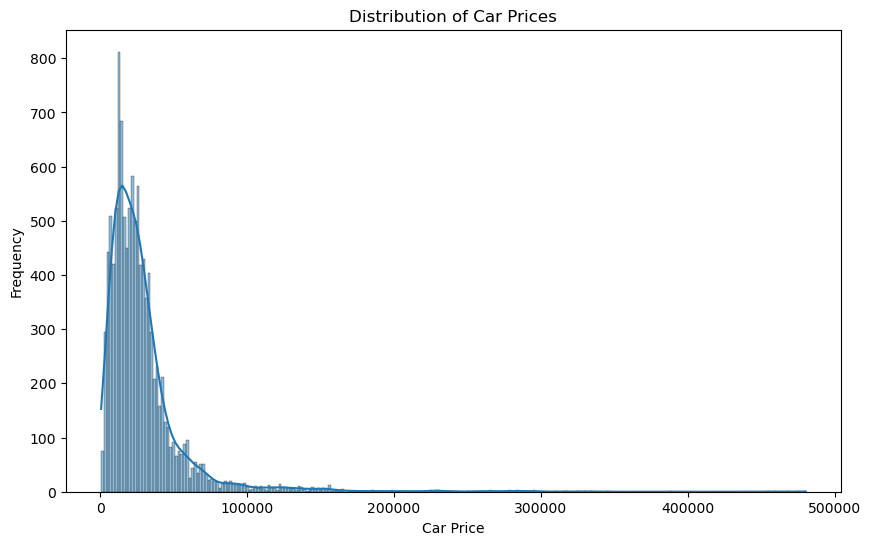

In [48]:
plt.figure(figsize=(10, 6))
sns.histplot(data['car_price'], kde=True)
plt.title("Distribution of Car Prices")
plt.xlabel("Car Price")
plt.ylabel("Frequency")
plt.show()

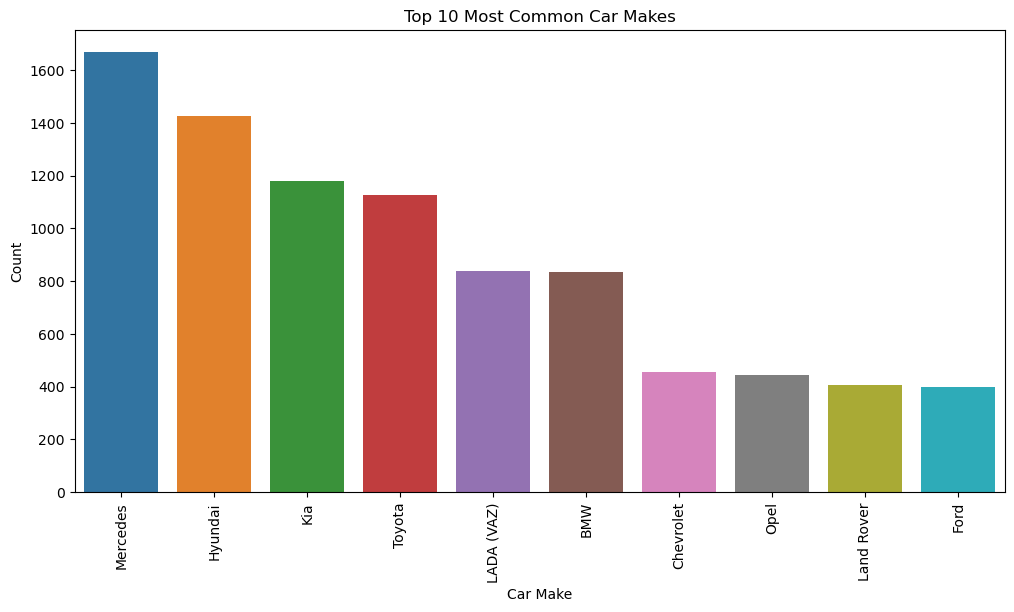

In [49]:
top_10_makes = data['make'].value_counts().head(10).index

plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='make', order=top_10_makes)
plt.title("Top 10 Most Common Car Makes")
plt.xlabel("Car Make")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

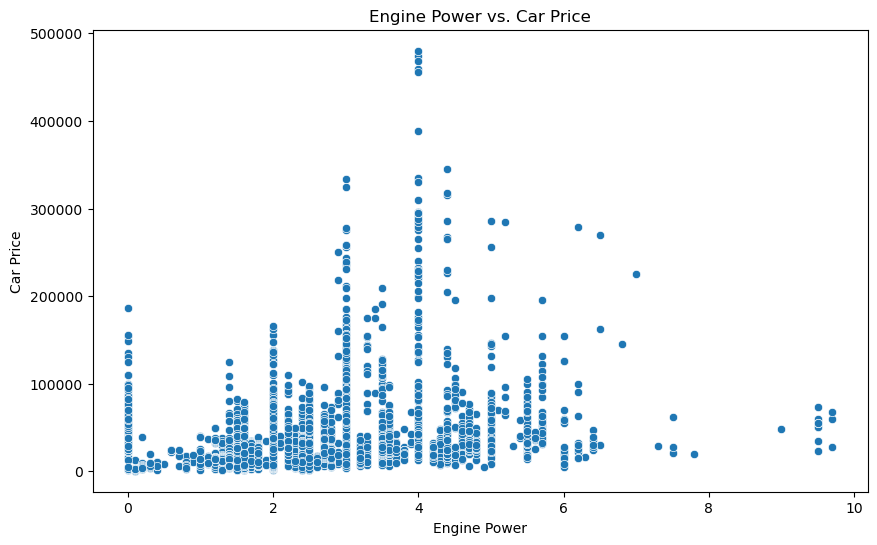

In [50]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='engine_power', y='car_price', data=data)
plt.title("Engine Power vs. Car Price")
plt.xlabel("Engine Power")
plt.ylabel("Car Price")
plt.show()

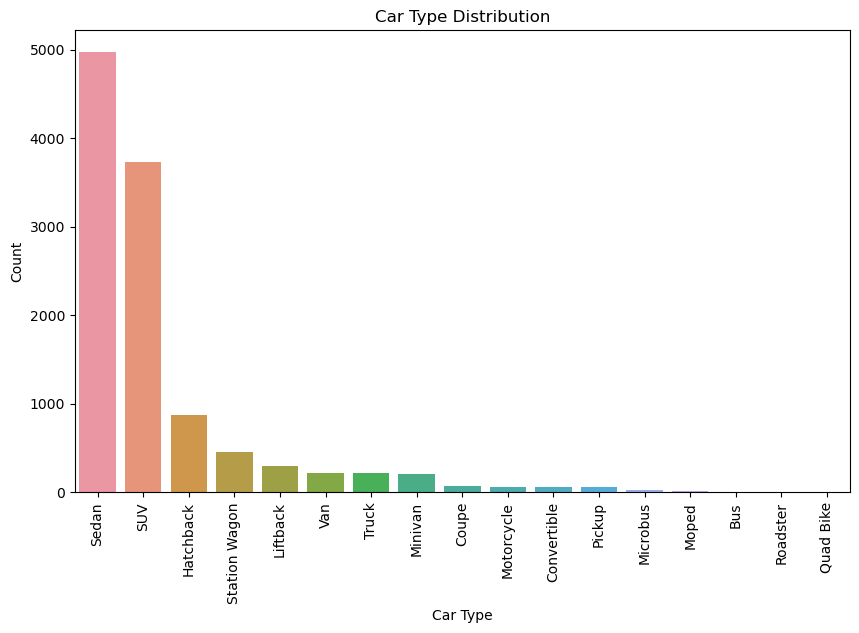

In [51]:
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x=data['ban_type'].value_counts().index, y=data['ban_type'].value_counts())
plt.title("Car Type Distribution")
plt.xlabel("Car Type")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

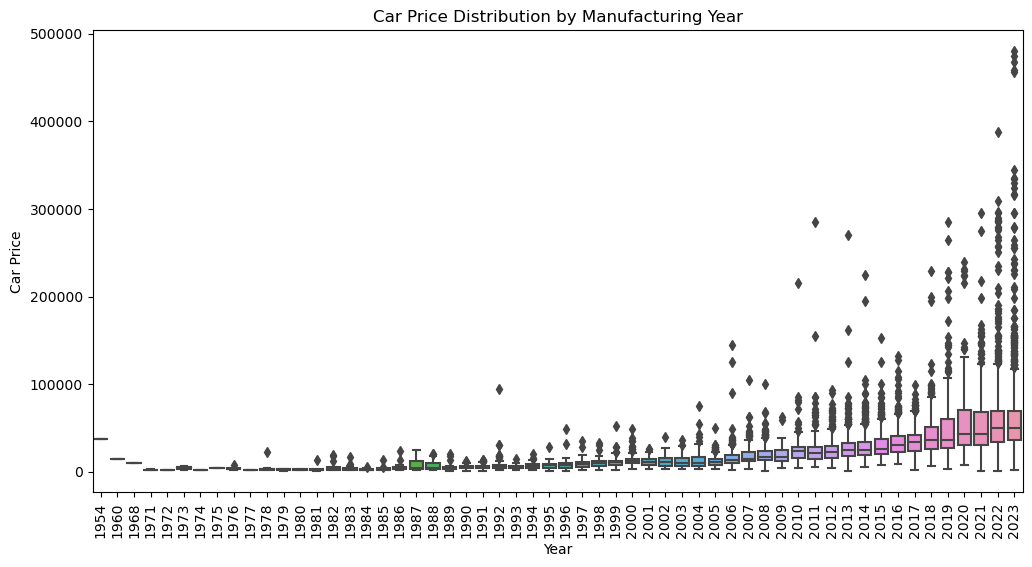

In [52]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='year', y='car_price', data=data)
plt.title("Car Price Distribution by Manufacturing Year")
plt.xlabel("Year")
plt.ylabel("Car Price")
plt.xticks(rotation=90)
plt.show()

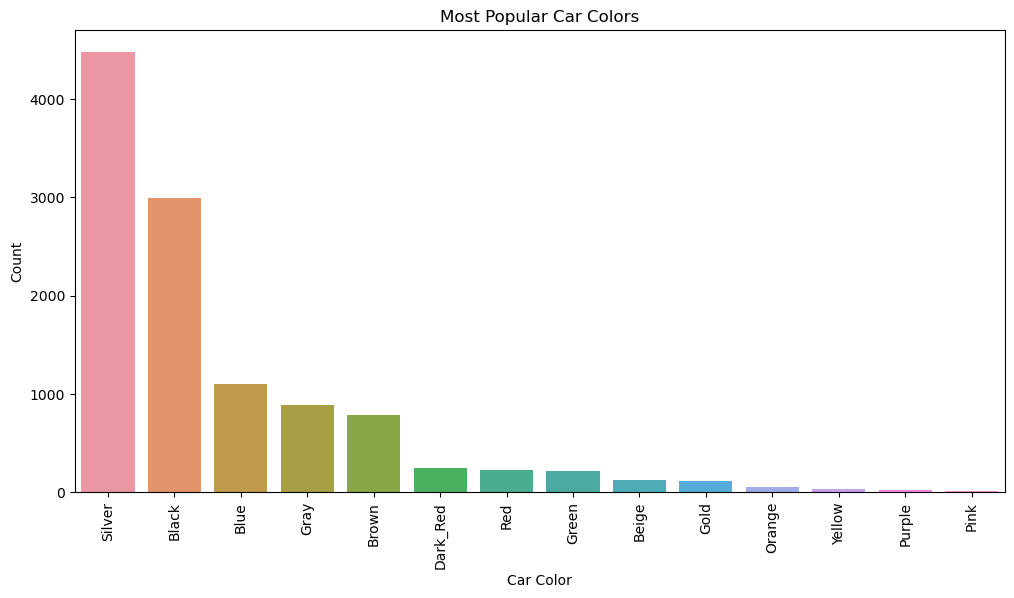

In [53]:
color_counts = data['colour'].value_counts().reset_index()
color_counts.columns = ['index', 'colour']
plt.figure(figsize=(12, 6))
sns.barplot(data=color_counts, x='index', y='colour')
plt.title("Most Popular Car Colors")
plt.xlabel("Car Color")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

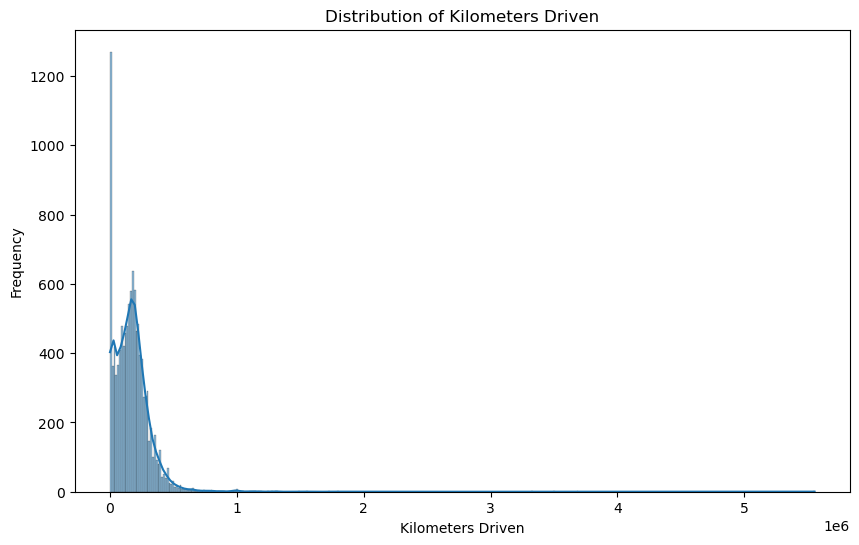

In [54]:
plt.figure(figsize=(10, 6))
sns.histplot(data['ride_km'], kde=True)
plt.title("Distribution of Kilometers Driven")
plt.xlabel("Kilometers Driven")
plt.ylabel("Frequency")
plt.show()

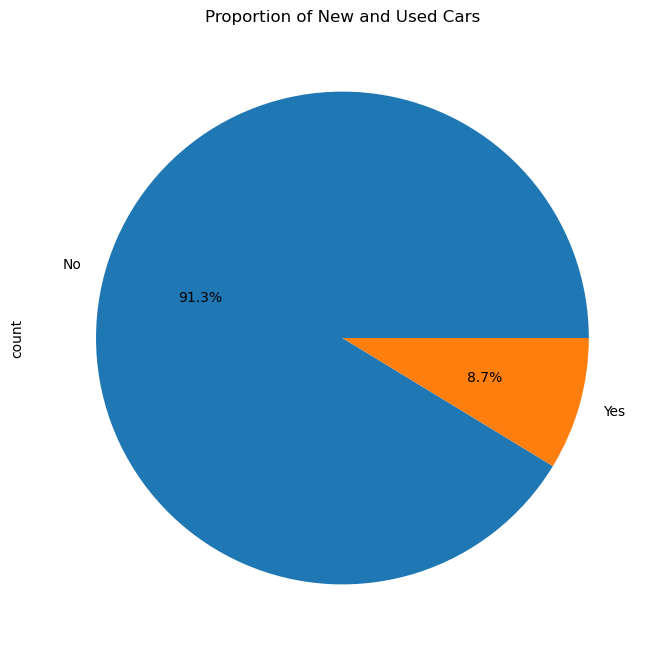

In [55]:
plt.figure(figsize=(8, 8))
data['is_new'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Proportion of New and Used Cars")
plt.show()

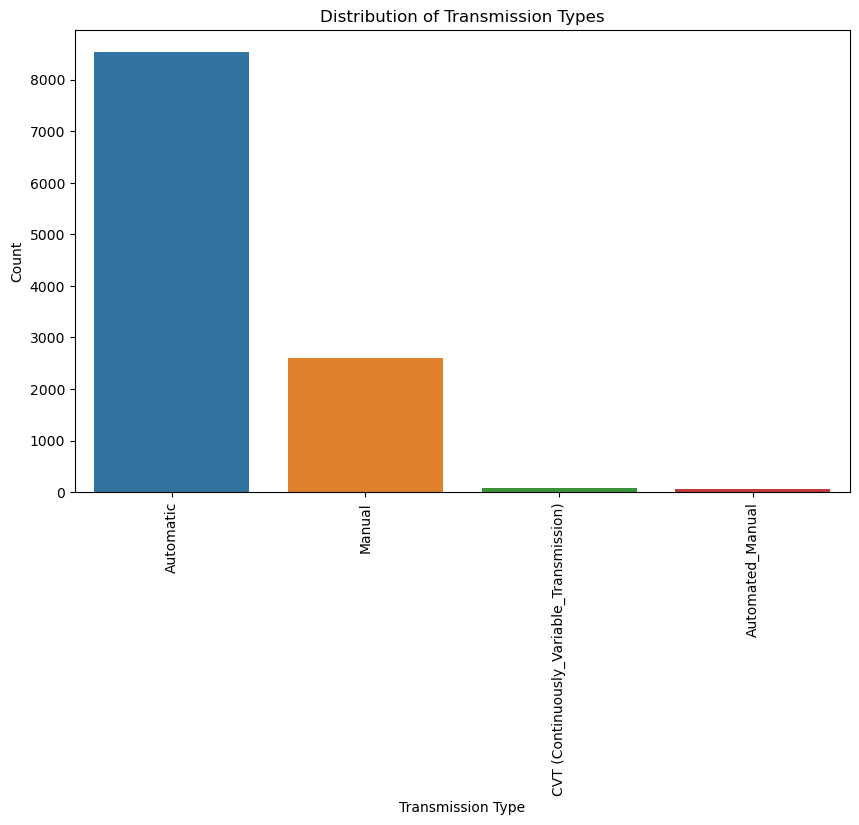

In [56]:
plt.figure(figsize=(10, 6))
transmission_counts = data['transmission'].value_counts().reset_index()
transmission_counts.columns = ['Transmission Type', 'Count']
sns.barplot(data=transmission_counts, x='Transmission Type', y='Count')
plt.title("Distribution of Transmission Types")
plt.xlabel("Transmission Type")
plt.ylabel("Count")
plt.xticks(rotation=90) 
plt.show()

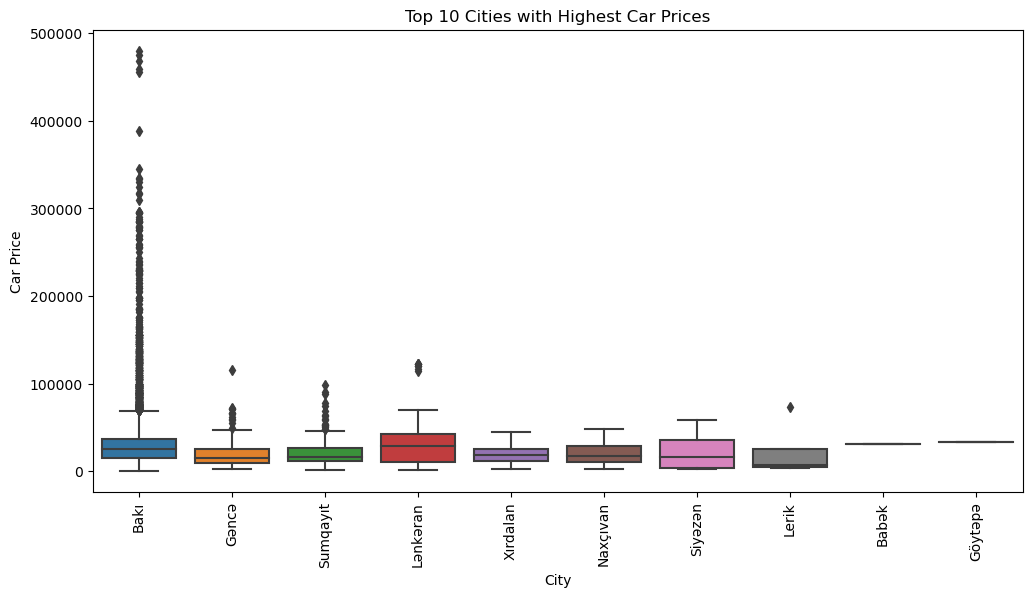

In [57]:
mean_car_prices = data.groupby('city')['car_price'].mean().reset_index()
top_10_cities = mean_car_prices.nlargest(10, 'car_price')
data_top_10_cities = data[data['city'].isin(top_10_cities['city'])]
plt.figure(figsize=(12, 6))
sns.boxplot(x='city', y='car_price', data=data_top_10_cities)
plt.title("Top 10 Cities with Highest Car Prices")
plt.xlabel("City")
plt.ylabel("Car Price")
plt.xticks(rotation=90)
plt.show()

## Modelling

In [58]:
def train_xgboost_model(data, original_features, target, test_size=0.2, random_state=42):
    data_copy = data[original_features + target].copy()
    data_copy = pd.get_dummies(data_copy, columns=['city', 'make', 'model', 'ban_type', 'colour', 'transmission', 'gear', 'is_new'])
    
    features = data_copy.columns.tolist()
    features.remove(target[0]) 
    
    X = data_copy[features]
    y = data_copy[target]
    
   
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    model = XGBRegressor()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    
    metrics = {
        'r2_score': r2,
        'mean_squared_error': rmse,
        'mean_absolute_error': mae
    }
    
    return metrics

original_features = ['views_cleaned', 'city', 'make', 'model', 'year', 'ban_type', 'colour', 'engine_power', 'ride_km', 'transmission', 'gear', 'is_new']
target = ['car_price']

metrics = train_xgboost_model(data, original_features, target)
metrics

{'r2_score': 0.919757283352891,
 'mean_squared_error': 8947.451451371775,
 'mean_absolute_error': 4388.905894738531}

## deployment